<a href="https://colab.research.google.com/github/jsten07/cms_routing/blob/main/firstCalculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load libraries
from skimage.graph import route_through_array
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from datetime import datetime, timedelta
import math

In [4]:
#create some example values

# create example Grids wit 100*100
N = 100
timeGrid= [[random.random() for i in range(N)] for j in range(N)]
startpoint=(1,10)
endpoint= (90,99)
startTime="15:00"
endTime="18:00"

In [5]:
#create Route
route, weight = route_through_array(timeGrid, startpoint, endpoint, fully_connected=False, geometric=True)
route

[(1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (2, 18),
 (3, 18),
 (3, 19),
 (3, 20),
 (3, 21),
 (3, 22),
 (4, 22),
 (4, 23),
 (4, 24),
 (5, 24),
 (6, 24),
 (7, 24),
 (8, 24),
 (9, 24),
 (10, 24),
 (10, 25),
 (10, 26),
 (10, 27),
 (11, 27),
 (11, 28),
 (12, 28),
 (13, 28),
 (13, 29),
 (13, 30),
 (14, 30),
 (14, 31),
 (14, 32),
 (14, 33),
 (14, 34),
 (14, 35),
 (15, 35),
 (16, 35),
 (17, 35),
 (18, 35),
 (18, 36),
 (18, 37),
 (19, 37),
 (20, 37),
 (21, 37),
 (21, 38),
 (21, 39),
 (21, 40),
 (21, 41),
 (20, 41),
 (20, 42),
 (20, 43),
 (21, 43),
 (21, 44),
 (22, 44),
 (23, 44),
 (24, 44),
 (24, 45),
 (25, 45),
 (26, 45),
 (27, 45),
 (28, 45),
 (28, 46),
 (28, 47),
 (28, 48),
 (29, 48),
 (30, 48),
 (30, 49),
 (31, 49),
 (31, 50),
 (32, 50),
 (33, 50),
 (34, 50),
 (35, 50),
 (36, 50),
 (37, 50),
 (38, 50),
 (39, 50),
 (40, 50),
 (41, 50),
 (41, 51),
 (41, 52),
 (41, 53),
 (42, 53),
 (42, 54),
 (43, 54),
 (44, 54),
 (45, 54),
 (46, 54),
 (46, 55),


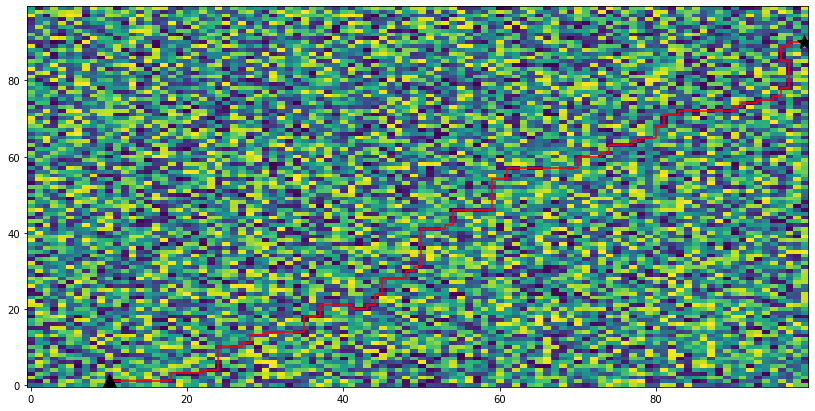

In [6]:
#plot route
routeDisplay=   np.stack(route, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [7]:
def makeArrays(route):
    routeNew = []
    for x in route:
      routeNew.append(list(x))
    return routeNew

In [8]:
route = makeArrays(route)
route

[[1, 10],
 [1, 11],
 [1, 12],
 [1, 13],
 [1, 14],
 [1, 15],
 [1, 16],
 [1, 17],
 [1, 18],
 [2, 18],
 [3, 18],
 [3, 19],
 [3, 20],
 [3, 21],
 [3, 22],
 [4, 22],
 [4, 23],
 [4, 24],
 [5, 24],
 [6, 24],
 [7, 24],
 [8, 24],
 [9, 24],
 [10, 24],
 [10, 25],
 [10, 26],
 [10, 27],
 [11, 27],
 [11, 28],
 [12, 28],
 [13, 28],
 [13, 29],
 [13, 30],
 [14, 30],
 [14, 31],
 [14, 32],
 [14, 33],
 [14, 34],
 [14, 35],
 [15, 35],
 [16, 35],
 [17, 35],
 [18, 35],
 [18, 36],
 [18, 37],
 [19, 37],
 [20, 37],
 [21, 37],
 [21, 38],
 [21, 39],
 [21, 40],
 [21, 41],
 [20, 41],
 [20, 42],
 [20, 43],
 [21, 43],
 [21, 44],
 [22, 44],
 [23, 44],
 [24, 44],
 [24, 45],
 [25, 45],
 [26, 45],
 [27, 45],
 [28, 45],
 [28, 46],
 [28, 47],
 [28, 48],
 [29, 48],
 [30, 48],
 [30, 49],
 [31, 49],
 [31, 50],
 [32, 50],
 [33, 50],
 [34, 50],
 [35, 50],
 [36, 50],
 [37, 50],
 [38, 50],
 [39, 50],
 [40, 50],
 [41, 50],
 [41, 51],
 [41, 52],
 [41, 53],
 [42, 53],
 [42, 54],
 [43, 54],
 [44, 54],
 [45, 54],
 [46, 54],
 [46, 55],


In [9]:
def calculateTime(route, startTime, endTime):
    sumTime = 0
    for x in route:
      sumTime = sumTime + timeGrid[x[0]][x[1]]
    startTime_object = datetime.strptime(startTime, "%H:%M" )
    endTime_object = datetime.strptime(endTime, "%H:%M" )
    minutes_added = timedelta(minutes  = sumTime)
    eta = startTime_object + minutes_added
    difference= endTime_object-eta
    total_seconds = difference.total_seconds()
    minutes = total_seconds/60
    return minutes


In [10]:
difference= calculateTime(route, startTime, endTime)
difference

133.39903851666665

In [11]:
def calculateBearing(route):
    for i in range(len(route)-1):
        if route[i][0]< route[i+1][0]:
            route[i].append("up")
        elif route[i][0] > route[i+1][0]:
            route[i].append("down")
        elif route[i][1] < route[i+1][1]:
            route[i].append("right")
        elif route[i][1] > route[i+1][1]:
            route[i].append("left")
        else:
             route[i].append("error")

In [12]:
calculateBearing(route)


In [13]:
route

[[1, 10, 'right'],
 [1, 11, 'right'],
 [1, 12, 'right'],
 [1, 13, 'right'],
 [1, 14, 'right'],
 [1, 15, 'right'],
 [1, 16, 'right'],
 [1, 17, 'right'],
 [1, 18, 'up'],
 [2, 18, 'up'],
 [3, 18, 'right'],
 [3, 19, 'right'],
 [3, 20, 'right'],
 [3, 21, 'right'],
 [3, 22, 'up'],
 [4, 22, 'right'],
 [4, 23, 'right'],
 [4, 24, 'up'],
 [5, 24, 'up'],
 [6, 24, 'up'],
 [7, 24, 'up'],
 [8, 24, 'up'],
 [9, 24, 'up'],
 [10, 24, 'right'],
 [10, 25, 'right'],
 [10, 26, 'right'],
 [10, 27, 'up'],
 [11, 27, 'right'],
 [11, 28, 'up'],
 [12, 28, 'up'],
 [13, 28, 'right'],
 [13, 29, 'right'],
 [13, 30, 'up'],
 [14, 30, 'right'],
 [14, 31, 'right'],
 [14, 32, 'right'],
 [14, 33, 'right'],
 [14, 34, 'right'],
 [14, 35, 'up'],
 [15, 35, 'up'],
 [16, 35, 'up'],
 [17, 35, 'up'],
 [18, 35, 'right'],
 [18, 36, 'right'],
 [18, 37, 'up'],
 [19, 37, 'up'],
 [20, 37, 'up'],
 [21, 37, 'right'],
 [21, 38, 'right'],
 [21, 39, 'right'],
 [21, 40, 'right'],
 [21, 41, 'down'],
 [20, 41, 'right'],
 [20, 42, 'right'],
 [20

In [14]:
def manipulate(route):
  randomNumber = random.random()*len(route)
  startIndex= math.floor(randomNumber)
  startpoint = route[startIndex]
  endIndex= math.floor(startIndex + (random.random() * (len(route)-startIndex)))
  endpoint= route[endIndex]
  newGrid= [[random.random() for i in range(N)] for j in range(N)]
  manipulateRoute, weight = route_through_array(newGrid, startpoint[0:2], endpoint[0:2], fully_connected=False, geometric=True)
  manipulateRoute = makeArrays(manipulateRoute)
  manipulatedRoute = []
  for i in range(startIndex):
            manipulatedRoute.append(route[i])
  for x in manipulateRoute:
    manipulatedRoute.append(x)
  for i in range((endIndex+1),len(route)):
            manipulatedRoute.append(route[i])
  return manipulatedRoute




In [15]:
manipulatedRoute = manipulate(route)
manipulatedRoute

[[1, 10, 'right'],
 [1, 11, 'right'],
 [1, 12, 'right'],
 [1, 13, 'right'],
 [1, 14, 'right'],
 [1, 15, 'right'],
 [1, 16, 'right'],
 [1, 17, 'right'],
 [1, 18, 'up'],
 [2, 18, 'up'],
 [3, 18, 'right'],
 [3, 19, 'right'],
 [3, 20, 'right'],
 [3, 21, 'right'],
 [3, 22, 'up'],
 [4, 22, 'right'],
 [4, 23, 'right'],
 [4, 24, 'up'],
 [5, 24, 'up'],
 [6, 24, 'up'],
 [7, 24, 'up'],
 [8, 24, 'up'],
 [9, 24, 'up'],
 [10, 24, 'right'],
 [10, 25, 'right'],
 [10, 26, 'right'],
 [10, 27, 'up'],
 [11, 27, 'right'],
 [11, 28, 'up'],
 [12, 28, 'up'],
 [13, 28, 'right'],
 [13, 29, 'right'],
 [13, 30, 'up'],
 [14, 30, 'right'],
 [14, 31, 'right'],
 [14, 32, 'right'],
 [14, 33, 'right'],
 [14, 34, 'right'],
 [14, 35, 'up'],
 [15, 35, 'up'],
 [16, 35, 'up'],
 [17, 35, 'up'],
 [18, 35, 'right'],
 [18, 36, 'right'],
 [18, 37, 'up'],
 [19, 37, 'up'],
 [20, 37, 'up'],
 [21, 37, 'right'],
 [21, 38, 'right'],
 [21, 39, 'right'],
 [21, 40, 'right'],
 [21, 41, 'down'],
 [20, 41, 'right'],
 [20, 42, 'right'],
 [20

In [16]:
def removeBearingForDisplay(route):
  newRoute= []
  for x in route:
      newRoute.append(x[0:2])
  return newRoute

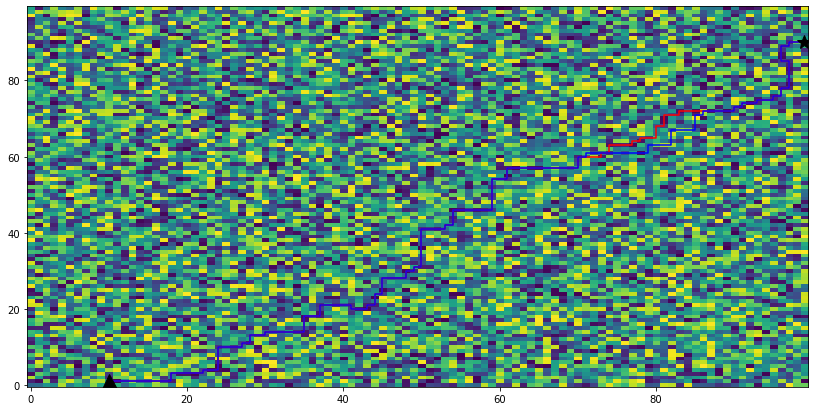

In [17]:
routeDisplay= removeBearingForDisplay(route)
routeDisplay=  np.stack(routeDisplay, axis=-1)
manipulateRouteDisplay= removeBearingForDisplay(manipulatedRoute)
manipulateRouteDisplay= np.stack(manipulateRouteDisplay, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
plt.plot(manipulateRouteDisplay[1],manipulateRouteDisplay[0], 'b')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [18]:
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.argmin(dist_2)

In [19]:
def crossover(route1, route2):
  randomNumber = math.floor(random.random()*len(route))
  crossoverPoint1 = route1[randomNumber]
  index= closest_node(crossoverPoint1, route2)
  crossoverPoint2 = route2[index]
  print(index, crossoverPoint1, crossoverPoint2)
  newGrid= [[random.random() for i in range(N)] for j in range(N)]
  crossoverRoute, weight = route_through_array(newGrid, crossoverPoint1[0:2], crossoverPoint2[0:2], fully_connected=False, geometric=True)
  child1= []
  child2= []
  print(route1[0:randomNumber], crossoverRoute, route2[index:len(route2)])
  print(route2[0:index], crossoverRoute, route1[randomNumber:len(route1)])
  for i in range(randomNumber):
    child1.append(route1[i])
  for i in range(index):
    child2.append(route2[i])
  for x in crossoverRoute:
    child1.append(x)
  for i in range(len(crossoverRoute) -1, 0, -1):
    print(i)
    child2.append(crossoverRoute[i])
  for i in range(index +1,len(route2)):
    child1.append(route2[i])
  for i in range(randomNumber,len(route1)):
    child2.append(route1[i])
  return[child1, child2, crossoverRoute]



In [20]:
newGrid= [[random.random() for i in range(N)] for j in range(N)]
route2, weight = route_through_array(newGrid, startpoint, endpoint, fully_connected=False, geometric=True)


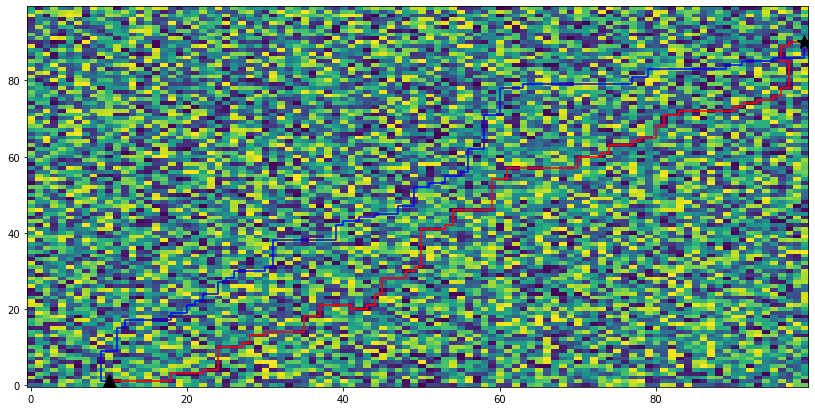

In [21]:
routeDisplay= removeBearingForDisplay(route)
routeDisplay=  np.stack(routeDisplay, axis=-1)
route2Display= removeBearingForDisplay(route2)
route2Display= np.stack(route2Display, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
plt.plot(route2Display[1],route2Display[0], 'b')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [34]:
childs = crossover(route, route2)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [28]:
child1Display= removeBearingForDisplay(childs[0])
child1Display=  np.stack(child1Display, axis=-1)
child2Display= removeBearingForDisplay(childs[1])
child2Display= np.stack(child2Display, axis=-1)

crossoverDisplay= np.stack(childs[2], axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(child1Display[1],child1Display[0], 'r')
plt.plot(child2Display[1],child2Display[0], 'b')
plt.plot(crossoverDisplay[1],crossoverDisplay[0], 'g')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

NameError: name 'childs' is not defined

In [29]:
def findDuplicate(node, nodes, index):
    nodes= nodes[index: len(nodes)]
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.where(dist_2 == 0)

In [30]:
def eleminateDuplicates(route):
    for i in range(0, len(route)):
      duplicate=findDuplicate(route[i],route, i)
      duplicate=duplicate[0]
      if len(duplicate) > 1:
        print(duplicate[0], duplicate[1])
        newArray= route[:i] + route[i+duplicate[1]:]
        return newArray
    return route


In [31]:
child1 = eleminateDuplicates(childs[0])
child2 = eleminateDuplicates(childs[1])

NameError: name 'childs' is not defined

In [32]:
child1Display= removeBearingForDisplay(child1)
child1Display=  np.stack(child1Display, axis=-1)
child2Display= removeBearingForDisplay(child2)
child2Display= np.stack(child2Display, axis=-1)

crossoverDisplay= np.stack(childs[2], axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(child1Display[1],child1Display[0], 'r')
plt.plot(child2Display[1],child2Display[0], 'b')
plt.plot(crossoverDisplay[1],crossoverDisplay[0], 'g')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

NameError: name 'child1' is not defined

In [33]:
findDuplicate([1,10], childs[1], 0)

NameError: name 'childs' is not defined

### Mutate offspring

In [1]:
def mutate(crossover_offspring, probability, timeGrid):
    
    mutant_offspring = copy.deepcopy(crossover_offspring)
    
    for i in range(1, len(mutant_offspring)):
        if random.random() < probability:
            
            go = True

            while go:

                possible_values = np.nonzero(timeGrid[mutant_offspring[i-1]])
                proposed_value = random.randint(0,len(possible_values[0])-1)
                crossover_offspring = np.append(mutant_offspring, possible_values[0][proposed_value])

                if mutant_offspring[i] == len(timeGrid)-1:
                    go = False
                else:
                    i += 1
    
    return mutant_offspring

In [2]:
mutate(child1, 0.05, timeGrid)

NameError: name 'child1' is not defined

In [ ]:
### Merge main population and offsprings